In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
X_train.shape

(60000, 28, 28)

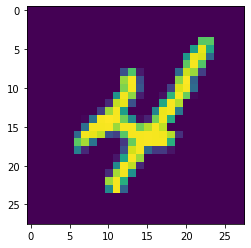

In [21]:
plt.imshow(X_train[9])

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
y_train.shape

(60000,)

In [55]:
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [29]:
#scalling the images between 0 - 1

X_train = X_train/255
X_test = X_test/255

In [34]:
X_train[0].max(),X_train[0].min()

(1.0, 0.0)

In [35]:
X_train.shape

(60000, 28, 28)

In [37]:
X_test.shape

(10000, 28, 28)

In [38]:
#reshaping with batch size, width, height, colour channels

X_train = X_train.reshape(60000, 28, 28,1)
X_test = X_test.reshape(10000, 28, 28,1)

In [39]:
from tensorflow.keras.models import Sequential

In [40]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [59]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

#ouputlayer softtmax --> multiclass
# 10 layers because your target is in shape of 10 
model.add(Dense(10,activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
earlystops = EarlyStopping(monitor='val_loss',patience=1)

In [58]:
X_train.shape, y_cat_train.shape, X_test.shape, y_cat_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [60]:
model.fit(x=X_train,y=y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),
          callbacks=[earlystops])

Epoch 1/200
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2936 - accuracy: 0.9083 - val_loss: 0.0603 - val_accuracy: 0.9818
Epoch 2/200
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.0574 - val_accuracy: 0.9821
Epoch 3/200
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.0468 - val_accuracy: 0.9848
Epoch 4/200
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0182 - accuracy: 0.9946 - val_loss: 0.0367 - val_accuracy: 0.9890
Epoch 5/200
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0417 - val_accuracy: 0.9869


In [120]:
output = model.evaluate(X_test,y_cat_test, verbose=0)

print('Accuracy : {:.2f}%'.format((output[1])*100))
print('losses : {:.2f}%'.format((output[0])*100))

Accuracy : 98.69%
losses : 4.17%


In [63]:
losses = pd.DataFrame(model.history.history)

In [67]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.140323,0.957133,0.060253,0.9818
1,0.047870,0.985283,0.057394,0.9821
2,0.029100,0.990567,0.046760,0.9848
3,0.019848,0.993767,0.036709,0.9890
4,0.013014,0.995917,0.041731,0.9869


<AxesSubplot:>

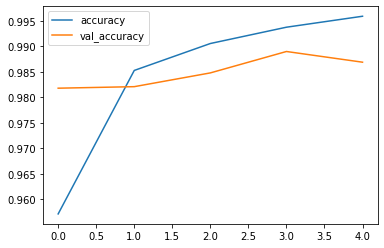

In [66]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

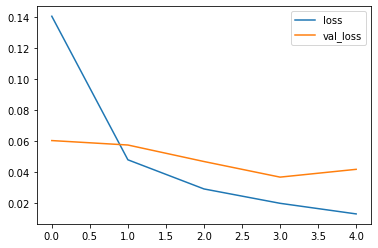

In [68]:
losses[['loss','val_loss']].plot()

In [91]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [104]:
X_test[0].shape

(28, 28, 1)

In [79]:
predict = model.predict_classes(X_test)

C:\Users\AMD\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [80]:
predict.shape

(10000,)

In [76]:
y_test.shape

(10000,)

In [86]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.97      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [87]:
confusion_matrix(y_test,predict)

array([[ 968,    0,    1,    0,    0,    2,    3,    1,    3,    2],
       [   3, 1125,    2,    2,    0,    1,    1,    0,    1,    0],
       [   0,    2, 1023,    1,    1,    0,    1,    0,    3,    1],
       [   0,    0,    0,  993,    0,   11,    0,    0,    3,    3],
       [   0,    0,    0,    0,  967,    0,    5,    0,    1,    9],
       [   0,    0,    0,    4,    0,  887,    1,    0,    0,    0],
       [   2,    2,    0,    0,    1,    4,  944,    0,    5,    0],
       [   1,    2,   13,    0,    0,    0,    0, 1001,    2,    9],
       [   2,    0,    1,    0,    0,    1,    0,    0,  966,    4],
       [   0,    0,    0,    0,    8,    3,    0,    1,    2,  995]],
      dtype=int64)

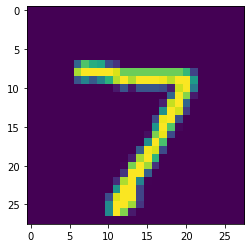

In [102]:
plt.imshow(X_test[0].reshape(28,28))

In [109]:
# reshape <-- num of images, width, height, color channels
model.predict_classes(X_test[0].reshape(1,28,28,1))

array([7], dtype=int64)

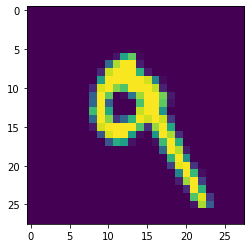

In [113]:
plt.imshow(X_test[7].reshape(28,28))

In [114]:
# reshape <-- num of images, width, height, color channels
model.predict_classes(X_test[7].reshape(1,28,28,1))

array([9], dtype=int64)